In [273]:
#import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [275]:
#read in dataset
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [277]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [279]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [281]:
#filling LotFrontage nulls with mean value
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [283]:
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [285]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [287]:
# Check for duplicate rows
df.duplicated().sum()

0

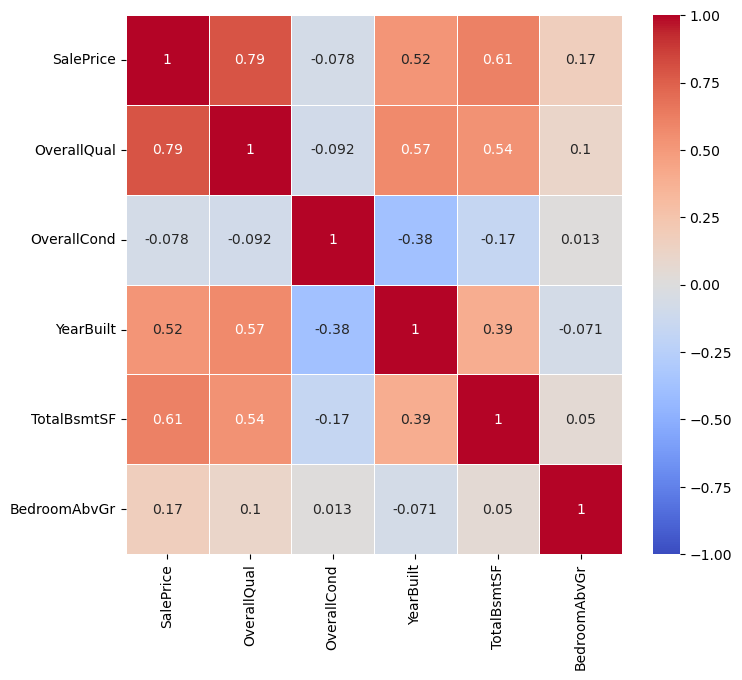

In [289]:
#heatmap
numerical_features = ['SalePrice', 'OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'BedroomAbvGr']
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.savefig('heatmap.png')
plt.show()

In [290]:
#exp1: modeling 
X = df.drop(columns=['SalePrice'])
Y = df['SalePrice']

#one-hot encoding to convert to numerical columns
X = pd.get_dummies(X, drop_first=True)

#dropping rows with nulls affecting models
X = X.dropna()
Y = Y[X.index]

In [293]:
#Data partition
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0) 
model = LinearRegression()
model.fit(X_train, Y_train)
print(model.score(X_test,Y_test))

0.8317737485562997


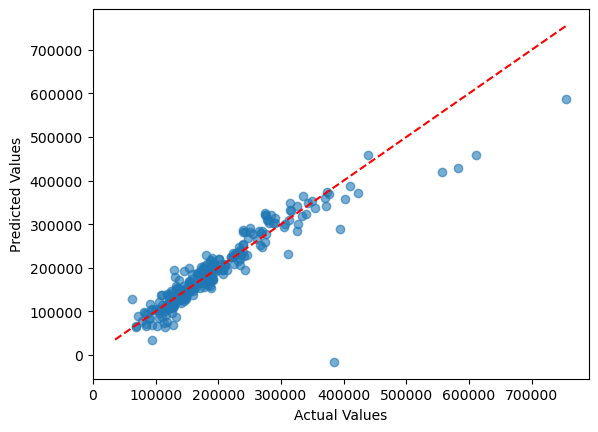

In [294]:
#model prediction
Y_pred = model.predict(X_test)

#graph 
plt.scatter(Y_test, Y_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
plt.savefig('model1.png')
plt.show()

In [297]:
#evaluating using rmse 
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred1))
print(rmse)


37498.59694491115


In [301]:
#Lasso regression 2nd model
lasso_model = Lasso(alpha=100)
lasso_model.fit(X_train, Y_train)
Y_pred = lasso_model.predict(X_test)

#evaluating the model after making predictions 
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
print(rmse)
print(r2)



34633.09062005867
0.8565018740024039


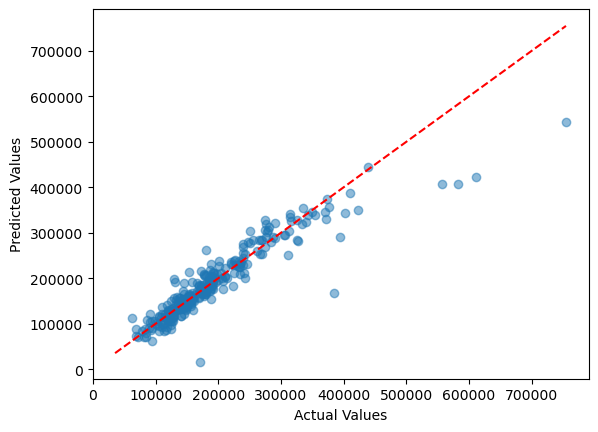

In [303]:
#visualization for scores above
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
plt.savefig('lasso.png')
plt.show()

In [305]:
#model 3
selected_features = ['OverallQual', 'OverallCond', 'YearBuilt', 'TotalBsmtSF', 'BedroomAbvGr']
X = df[selected_features]
Y = df['SalePrice']
#one-hot encoding to convert to numerical columns
X = pd.get_dummies(X, drop_first=True)

#dropping rows with nulls affecting models
X = X.dropna()
Y = Y[X.index]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state =0) 


In [307]:
#lasso 
lasso_model = Lasso(alpha=100)
lasso_model.fit(X_train, Y_train)
Y_pred = lasso_model.predict(X_test)

#evaluating the model after making predictions 
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)
print(rmse)
print(r2)


51516.45699945031
0.6156960612220386


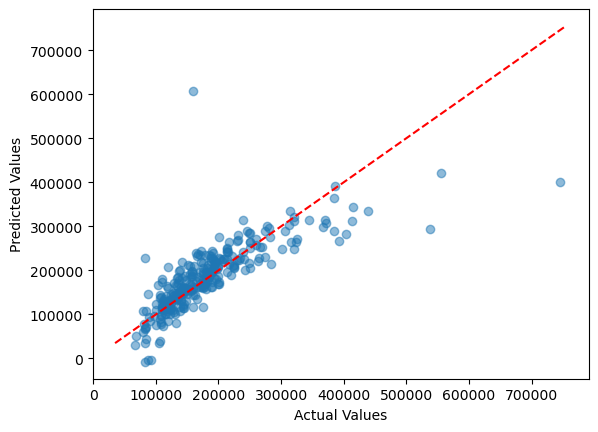

In [309]:
#visualization for scores above
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--')
plt.savefig('lasso2.png')
plt.show()